Author: Ernesto González
Date: 29/12/2019

In [2]:
import numpy as np
import pandas as pd
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

Let's start by reading the data file `dados.dat` and creating a dataframe

In [3]:
with open('dados.dat', 'r') as infile:
    readlines = infile.readlines()
    
    df = []

    for line in readlines: 
        temp = line.split('   ')
        for elem in temp:
            if elem == '':
                temp.remove(elem)
                continue
            temp[temp.index(elem)] = float(elem.strip())
        df.append([temp[0], float(temp[1]), temp[2], 
                   temp[3], temp[4], temp[5], temp[6], temp[7]])
            
df = pd.DataFrame(df)

In [4]:
df

,0,1,2,3,4,5,6,7
0,3.495620,0.854140,0.749902,0.192743,43.52330,2.02056,42.43320,84.10960
1,-4.480930,1.104820,0.485446,1.623300,9.09081,3.35892,46.48630,18.18030
2,2.775870,1.355500,0.220990,1.053850,24.65840,1.19727,50.53940,2.80000
3,1.696240,2.107530,0.427622,1.345510,21.36100,1.71233,8.69876,7.98009
4,-4.580720,2.358210,0.163166,0.776062,36.92860,3.05069,12.75190,6.76006
...,...,...,...,...,...,...,...,...
821,1.779430,0.027883,0.880700,0.162503,17.66680,2.34437,21.23360,0.10000
822,1.059680,0.529239,0.351788,1.023610,48.80190,1.52108,29.33990,32.86050
823,0.699809,0.779917,0.087332,0.454162,14.36940,2.85944,33.39300,4.00000
824,3.980060,1.281270,0.558420,1.315270,45.50450,2.03614,41.49920,42.51890


Before applying the PCA method we should normalize the data.

In [5]:
parameters = [0, 1, 2, 3, 4, 5, 6]

# separating out the parameters
x = df.loc[:, parameters].values

# separating out the output
y = df.loc[:,[7]].values

# standardizing the features
x = StandardScaler().fit_transform(x)

Now we can apply the PCA method

In [6]:
normalized_inputs = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_inputs)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

In [7]:
finalDf = pd.concat([principalDf, df[[7]]], axis=1)

In [8]:
finalDf

,principal component 1,principal component 2,7
0,1.106882,-1.321242,84.10960
1,-0.333107,0.409863,18.18030
2,-0.601398,0.621101,2.80000
3,-0.838568,-0.148524,7.98009
4,-0.860202,-0.569062,6.76006
...,...,...,...
821,0.451673,-2.562386,0.10000
822,-0.875158,-0.267020,32.86050
823,-1.023965,-0.958320,4.00000
824,0.278443,0.421765,42.51890


Now we use `pca.explained_variance_ratio_`. The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

In [9]:
pca.explained_variance_ratio_

array([0.18251581, 0.16080563])

This way we see that the first principal component contains 18.23% of the variance and the second principal component contains 16.08% of the variance. Together, the two components contain 34.33% of the information.

Now we use `pca.components_` that gives us the eigenvectors of the PCA method, i.e. the direction of the principal components 1 and principal component 2 in the original vector space.

In [10]:
pca.components_

array([[ 0.11221458,  0.53220522,  0.66025691, -0.27648913,  0.11041312,
         0.23912327,  0.34987008],
       [ 0.03630264,  0.46439203, -0.26086447,  0.72524986,  0.10218483,
        -0.12808001,  0.40266401]])

Portanto $$v_1=(0.11221458,0.53220522,0.66025691,-0.27648913,0.11041312,0.23912327,0.34987008)$$ e 
$$v_2=(0.03630264,0.46439203,-0.26086447,0.72524986,0.10218483,-0.12808001,0.40266401)$$

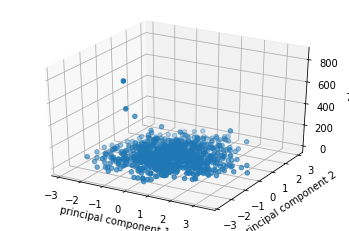

In [11]:
figure = pylab.figure().gca(projection='3d')
figure.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf[[7]])
figure.set_xlabel('principal component 1')
figure.set_ylabel('principal component 2')
figure.set_zlabel('7')
pylab.show()

# Apply PCA to whole dataframe

In [12]:
nDF = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(nDF)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

In [13]:
principalDf

,principal component 1,principal component 2
0,2.514710,-0.094856
1,-0.033750,0.281165
2,-0.720192,0.299280
3,-0.245678,0.829692
4,0.244227,1.134412
...,...,...
821,1.419264,0.390659
822,0.705759,1.258011
823,-0.083010,1.198327
824,1.028346,0.060652


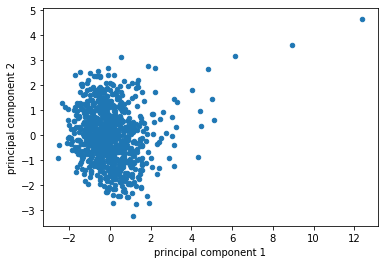

In [14]:
principalDf.plot(x='principal component 1', y='principal component 2', kind='scatter')

In [15]:
pca.components_

array([[ 0.05138702, -0.17186915,  0.44900399, -0.32321236,  0.29956843,
         0.3632416 , -0.08295572,  0.65816579],
       [-0.09973638, -0.68954647, -0.50366819,  0.0827247 ,  0.00906892,
        -0.08233037, -0.45706933,  0.19565374]])

In the above figure we see how data generally focuses around $(0,0)$. The exception is the group of datapoints with coordinates in PC1 larger than $2$. We will separate this two data regimes (first regime for datapoints with PC1 lesser or equal to 2, second regime are datapoints with PC1 coords bigger thant 2) and then apply PCA to each of them.

In [16]:
# separating the two regimes
first_regime_idx = principalDf.index[principalDf['principal component 1']<=2]
firstRegimeDf = df.loc[first_regime_idx]
second_regime_idx = principalDf.index[principalDf['principal component 1']>2]
secondRegimeDf = df.loc[second_regime_idx]

### First Regime

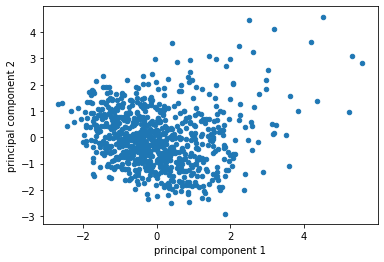

In [17]:
# Applying normalizing and applying PCA to first regime
nDF = StandardScaler().fit_transform(firstRegimeDf)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(nDF)
principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

principalDf.plot(x='principal component 1', y='principal component 2', kind='scatter')

In [18]:
pca.components_

array([[-0.02554221,  0.14924096,  0.58317163, -0.11981782,  0.32328441,
         0.29477109,  0.1648722 ,  0.63564426],
       [-0.12700845, -0.6527734 , -0.35486197,  0.22131772,  0.28415442,
         0.05319212, -0.33436201,  0.43298511]])

In [19]:
pca.explained_variance_ratio_

array([0.17640067, 0.15485737])

### Second Regime

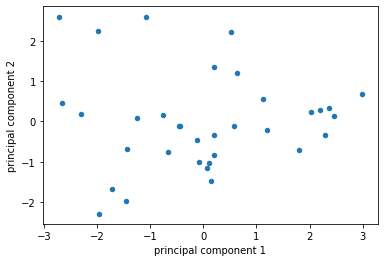

In [22]:
# Applying normalizing and applying PCA to second regime
nDF = StandardScaler().fit_transform(secondRegimeDf)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(nDF)
principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1', 'principal component 2'])
principalDf.plot(x='principal component 1', y='principal component 2', kind='scatter')

In [24]:
principalDf

,principal component 1,principal component 2
0,0.194243,-0.845734
1,0.067642,-1.149846
2,1.126239,0.564407
3,-1.088271,2.591307
4,2.283662,-0.332273
5,-2.309941,0.177017
6,0.203657,1.362402
7,2.461597,0.133797
8,-1.965393,-2.286330
9,-1.466056,-1.970528


In [52]:
pca.components_

array([[ 0.31735559,  0.60289043,  0.46245722,  0.34919558,  0.24053158,
         0.18508668,  0.17432564, -0.27839249],
       [ 0.29105121,  0.03692512, -0.17024696,  0.40373631,  0.30517285,
         0.02791753, -0.54186716,  0.57828092]])

In [54]:
pca.explained_variance_ratio_

array([0.29741875, 0.17813504])

### Discussion about first and second regime
From the above computations we get a PC1 for the first regime with $v_1=(-0.02554221,  0.14924096,  0.58317163, -0.11981782,  0.32328441, 0.29477109,  0.1648722,  0.63564426)$
<br>
and for the second regime $v_1=(0.31735559,  0.60289043,  0.46245722,  0.34919558,  0.24053158,
         0.18508668,  0.17432564, -0.27839249)$
         
         

\begin{array}{|c|c|} \hline
    \text{First Regime} & \text{Second Regime} \\ \hline
    -0.02554221 & 0.31735559 \\ \hline
    0.14924096 & 0.60289043 \\ \hline
    0.58317163 & 0.46245722 \\ \hline
    -0.11981782 & 0.34919558 \\ \hline
    0.32328441 & 0.24053158 \\ \hline
    0.29477109 & 0.18508668 \\ \hline
    0.1648722 & 0.17432564 \\ \hline
    0.63564426 & -0.27839249 \\ \hline
\end{array}

From column influence to the first regime is
- `Column 2`
- `Column 4`
- `Column 5`
- `Column 6`
- `Column 1`
- `Column 3`

# PCA for Sensitivity Analysis

Now we will apply the PCA method to the whole original dataset to understand what are the parameters that influence the the output.

In [25]:
# standardizing everything
normalizedDf = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalizedDf)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

In [26]:
pca.explained_variance_ratio_

array([0.17675722, 0.15752788])

In [27]:
pca.components_

array([[ 0.05138702, -0.17186915,  0.44900399, -0.32321236,  0.29956843,
         0.3632416 , -0.08295572,  0.65816579],
       [-0.09973638, -0.68954647, -0.50366819,  0.0827247 ,  0.00906892,
        -0.08233037, -0.45706933,  0.19565374]])

If algorithm is correct, the parameters in `column 0` and `column 6` do not influence the output in `column 7`

### Results
By order of influence to the output (from most influent to less influent) the columns are:
- `Column 2`
- `Column 5`
- `Column 3`
- `Column 4`
- `Column 1`
- `Column 6`
- `Column 0`

### Explained variance of each column to output by PCA

Here we apply PCA method to two-column dataframes, where the first column is one of the input columns in the original dataframe, and the second column is the output column in the original dataframe.

In [20]:
# for column 0
df_0 = pd.concat([df[[0]], df[[7]]], axis=1)
normalizedDf_0 = StandardScaler().fit_transform(df_0)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(normalizedDf_0)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1'])
pca.explained_variance_ratio_

array([0.50620015])

In [21]:
# for column 1
df_1 = pd.concat([df[[1]], df[[7]]], axis=1)
normalizedDf_1 = StandardScaler().fit_transform(df_1)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(normalizedDf_1)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1'])
pca.explained_variance_ratio_

array([0.60563565])

In [22]:
# for column 2
df_2 = pd.concat([df[[2]], df[[7]]], axis=1)
normalizedDf_2 = StandardScaler().fit_transform(df_2)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(normalizedDf_2)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1'])
pca.explained_variance_ratio_

array([0.60553149])

In [23]:
# for column 3
df_3 = pd.concat([df[[3]], df[[7]]], axis=1)
normalizedDf_3 = StandardScaler().fit_transform(df_3)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(normalizedDf_3)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1'])
pca.explained_variance_ratio_

array([0.51985005])

In [24]:
# for column 4
df_4 = pd.concat([df[[4]], df[[7]]], axis=1)
normalizedDf_4 = StandardScaler().fit_transform(df_4)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(normalizedDf_4)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1'])
pca.explained_variance_ratio_

array([0.5972727])

In [25]:
# for column 5
df_5 = pd.concat([df[[5]], df[[7]]], axis=1)
normalizedDf_5 = StandardScaler().fit_transform(df_5)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(normalizedDf_5)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1'])
pca.explained_variance_ratio_

array([0.58870904])

In [26]:
# for column 6
df_6 = pd.concat([df[[6]], df[[7]]], axis=1)
normalizedDf_6 = StandardScaler().fit_transform(df_6)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(normalizedDf_6)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1'])
pca.explained_variance_ratio_

array([0.53161605])

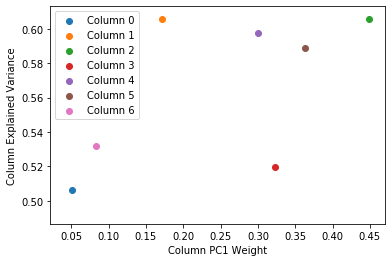

In [31]:
column_pc1_weight = [0.05138702, 0.17186915,  0.44900399, 0.32321236,  0.29956843,
         0.3632416 , 0.08295572]
column_explained_variance = [0.50620015, 0.60563565, 0.60553149, 0.51985005, 0.5972727, 0.58870904, 0.53161605]

labels = ['Column 0', 'Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5', 'Column 6']

for i in range(7):
    pylab.scatter(column_pc1_weight[i], column_explained_variance[i], label=labels[i])
pylab.legend()
pylab.xlabel('Column PC1 Weight')
pylab.ylabel('Column Explained Variance')
pylab.show()